In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal,ndimage,stats
import librosa
import librosa.display
import IPython.display as ipd

# LAB 12 - Spectrograms and Time-Frequency Processing

## DUE:  19 April 2023 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499 

The purpose of this lab is to give you practice with the Spectograms and thinking about time-frequency data processing. Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

## Q1: Chirp, Chirp

Your manager comes to you with an idea to change your company's vibroseis sweep to enhance the lower frequencies in your seismic data.  Instead of completing a **linear** sweep (i.e., $\propto t$) between starting and ending frequencies, $f_0=1$ Hz and $f_1=100$ Hz, your manager is now requesting that the chirp signal be a **cubic** function (i.e., $\propto t^3$) between the same $f_0$ and $f_1$ range. 

1. Design an 8-second **cubic** chirp signal satisfying these requirements. Plot the time-domain waveform to illustrate your solution on a subplot. 

2. Compare this with an 8-second **linear** chirp signals from the notes by including a second subplot.

3. Generate the Fourier Spectra for both the **linear** and **cubic** chirp signals on a third subplot. Discuss the differences  you observe between the waveforms.

4. Can you hear a difference between the two chirp signals? Add the two waveforms together and listen to them.  Describe what you hear.

We need to find the phase function. Since we are finding the cubic our instaneous frequency $f(t)$ is,
\begin{equation*}
f(t) = f_0 + k t^2.
\end{equation*}
Integrating, we find our phase function is:
\begin{equation*}
\phi (t) = 2 \pi (f_0 t + \frac{1}{3}kt^3).
\end{equation*}

Thus the chirp signal we are using is,
\begin{equation*}
x(t) = e^{i\left( \phi _{0}+2\pi \left(f_{0}t+{\frac  {k}{3}}t^{3}\right)\right)} =
e^{i\phi _{0}} e^{i 2\pi f_{0}t} e^{i 2\pi(f_1-f_0) t^{3}/(3t_1) }
\end{equation*}

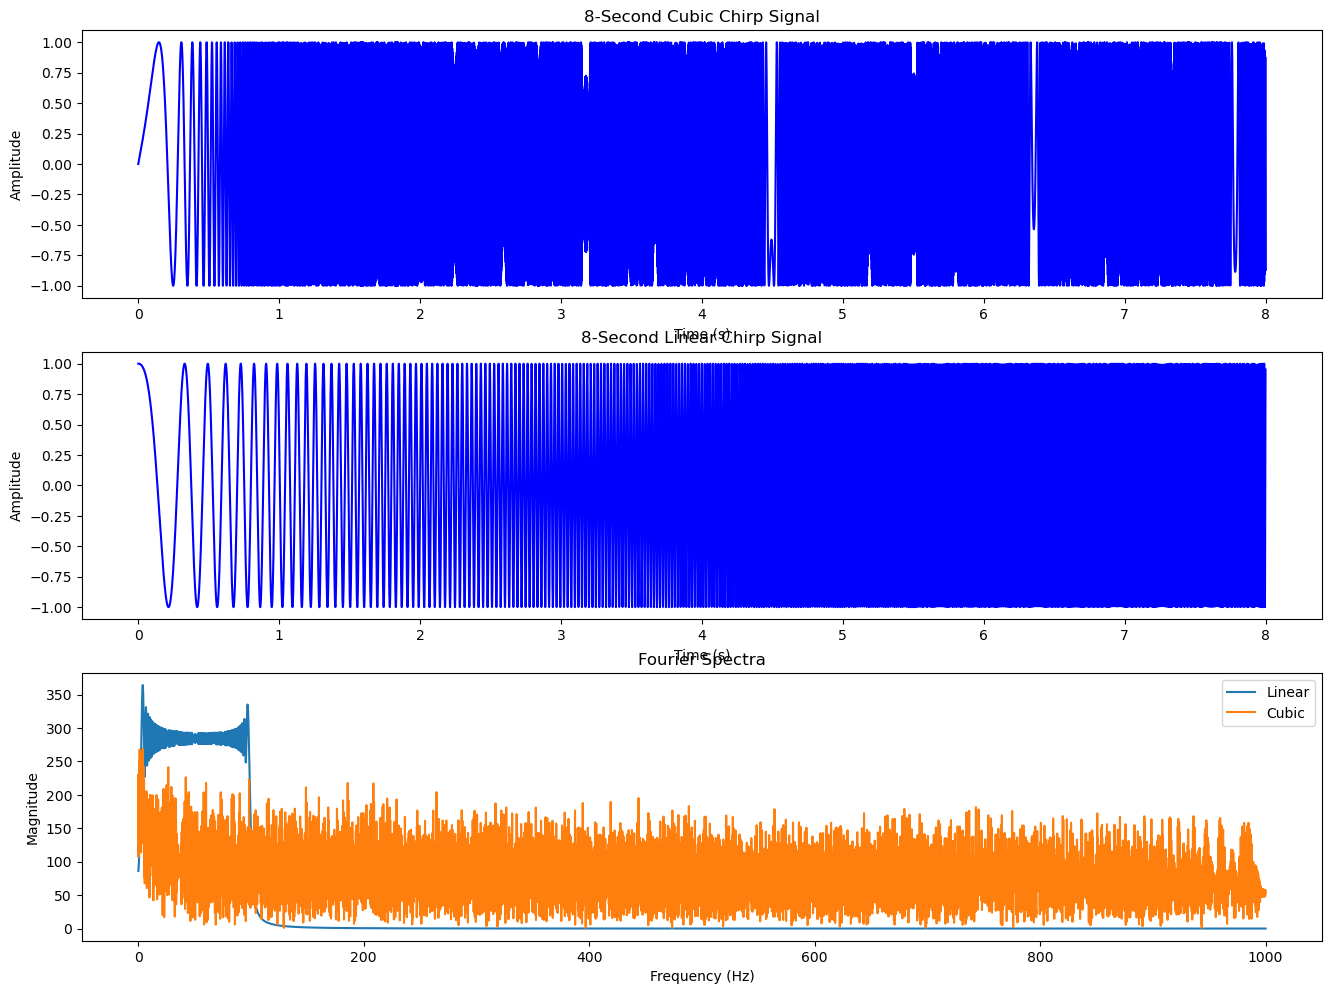

In [2]:
# . . Your answer here
plt.figure(figsize=(16, 16))
nt,dt=2000*8,0.0005
f0,f1=1,100
t1 = nt*dt
t=np.array(np.arange(0,nt))*dt

#1
sig1 = np.sin(2 * np.pi * (f0 * t + ((f1-f0)/3) * t**3))
plt.subplot(411)
plt.plot(t, sig1, color='blue')
plt.title('8-Second Cubic Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#2
sig2=signal.chirp(t,f0=f0,t1=t1, f1=f1,method='linear')
plt.subplot(412)
plt.plot(t, sig2, color='blue')
plt.title('8-Second Linear Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#3
sig1_FFT = np.fft.fft(sig1)
sig2_FFT = np.fft.fft(sig2)
freqs = np.fft.fftfreq(nt,d=dt)
plt.subplot(413)
plt.plot(freqs[:len(freqs)//2], np.abs(sig2_FFT[:len(freqs)//2]), label='Linear')
plt.plot(freqs[:len(freqs)//2], np.abs(sig1_FFT[:len(freqs)//2]), label='Cubic')
plt.title('Fourier Spectra')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()                     

#### Question 1.3:

We see that the cubic chirp's fourier spectra is wider and has more frequency components/content than the linear chirp. We expected this because the cubic chirp signal's generation is more complex. We see that after approximately $160 \; Hz$ the linear chirp signal dies away while the cubic signal remains strong.

In [8]:
#4
print("Cubic")
ipd.Audio(sig1, rate=2/dt) 

Cubic


In [9]:
print("Linear")
ipd.Audio(sig2, rate=2/dt) 

Linear


In [10]:
#combined
sig3=sig1+sig2
print("Cubic + Linear")
ipd.Audio(sig3, rate=2/dt) 

Cubic + Linear


#### Question 1.4
We can here the difference between the cubic and linear signal. I hear the cubic signal pretty distincly throughout the entire audio clip, but as time moves on I start to hear the linear signal better/more. 

## Q2: Magnetic Observatory Data

Let's look some geomagnetic data from the [Swedish Magnetic Observatory](http://www2.irf.se/Observatory/?link[Magnetometers]=Data) to see if we can see any time-varying behavior of the Earth's geomagnetic field (as measured in Sweden).

1. Read in the data in ASCII format and remove the mean of the data using a set of Python commands similar to:
```python
f = open('MAG.txt', 'r')
XX = []
for line in f:
    line = line.strip()
    columns = line.split()
    XX.append(float(columns[1]))
XX -= np.mean(XX)
```
2. Plot the X field of the magnetic data as a function of time.  (The time series is sampled at 1Hz.)

3. Using examples provided in the course notes, generate and plot a **spectrogram** of the magnetic time series using *pcolormesh*.  Note that this will involve adjusting variables *nperseg*, *noverlap* of the *spectrogram* call, and the *vmin* and *vmax* variables of the *pcolormesh* call in order to get a sensible image.

4. Describe the time-varying phenomena and any significant stationary features that you observe in your spectrogram.

Text(0.5, 0, 'Time (s)')

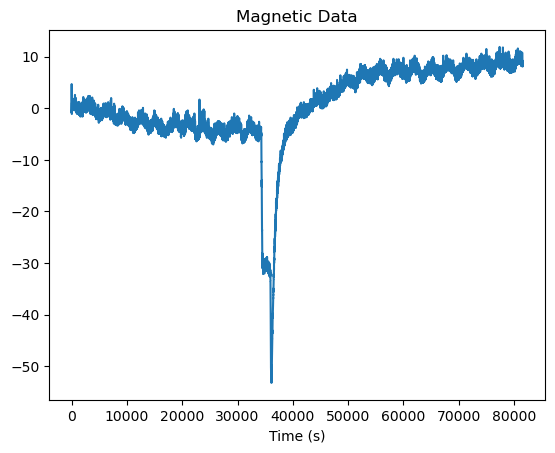

In [31]:
# . . Your answer here
f = open('MAG-1.txt', 'r')
XX = []
for line in f:
    line = line.strip()
    columns = line.split()
    XX.append(float(columns[1]))
XX -= np.mean(XX)
#2
time=np.arange(0, len(XX), 1)
plt.plot(time, XX)
plt.title("Magnetic Data")
plt.xlabel("Time (s)")

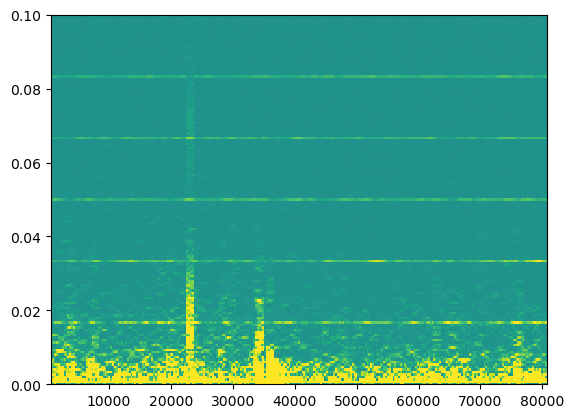

In [57]:
# . . Your answer here
# . . Compute Spectrogram
fM, tM, SM = signal.spectrogram(XX,1,nperseg=1500,noverlap=1200)
plt.pcolormesh(tM, fM, SM,cmap='viridis',vmin=-10,vmax=10)
plt.ylim(0,.1)
plt.show()

#### 4
We see that the earth's geomagnetic field has a spike in amplitude at $35000$ seconds in the time-plot, we can also see this behavior in the spectrogram by the thick vertical line. Overall the frequency components seem to be of a lower frequency level. I notice that in the spectogram there are multiple horizontal lines, I think this is because of the values I selected for the spectrogram. I attempted to limit the lines without getting rid of too much of our lower frequency values.         